<a href="https://colab.research.google.com/github/mahin-arvind/Seoul-Bike-Sharing-Demand-Prediction-Capstone-Project/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [29]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
path1 = '/content/drive/MyDrive/Datasets/Regression/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv'
df = pd.read_csv(path1, encoding= 'unicode_escape')

In [32]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [33]:
df.shape

(8760, 14)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



---
>* **The bike sharing demand dataset has 14 features and 8760 rows.**
>
>* **There are 4 categorical attributes and 10 numerical attributes**
>
>* **'Rented Bike Count' is the attribute we aim to predict**
>
>* **The data does not have any null values**
---




Statistical Information on Numerical features

In [35]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Looking for duplicates rows

In [36]:
len(df[df.duplicated()])

0




---


> * **No Duplicate rows present in the Dataset**




---






#Exploratory Data Analysis

**Categorizing features as numerical and categorical**

In [37]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [38]:
numerical_features = [ftr for ftr in df.columns if df[ftr].dtype != 'O'] 
categorical_features = [ftr for ftr in df.columns if df[ftr].dtype == 'O'] 
target = ['Rented Bike Count']
numerical_features.remove(target[0])

## Univariate Analysis

###Distribution of Numerical Features

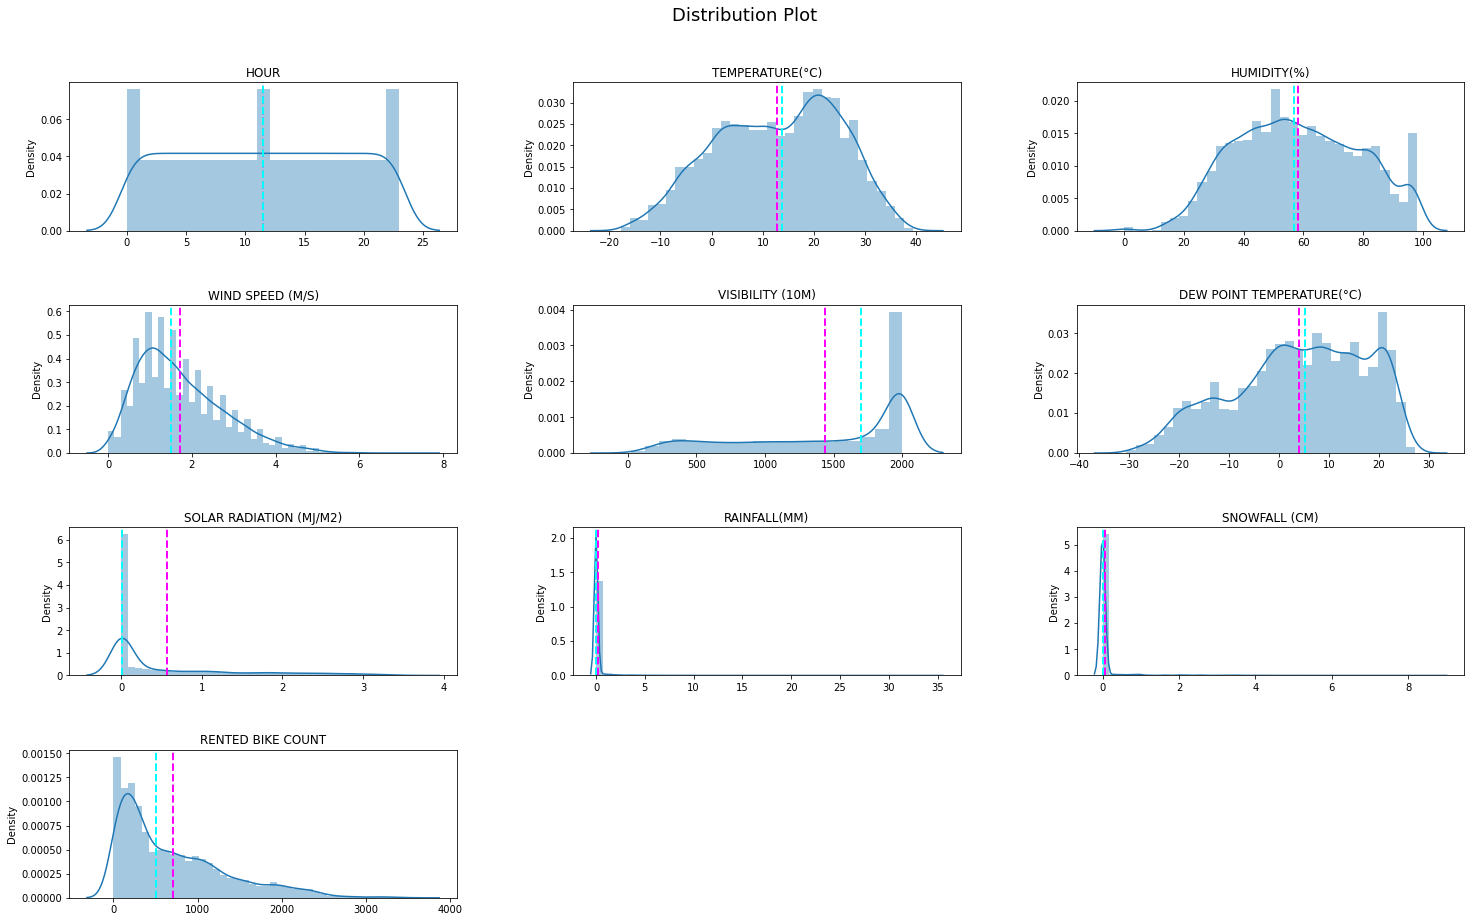

In [39]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25, 15))
plt.suptitle("Distribution Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features + target):
  # add a new subplot iteratively
  ax = plt.subplot(4,3, n + 1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  # filter df and plot ticker on the new subplot axis
  sns.distplot(df[ticker])
  plt.axvline(df[ticker].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[ticker].median(), color='cyan', linestyle='dashed', linewidth=2)   
  ax.set_title(ticker.upper())
  ax.set_xlabel("")




---
> * **Other than 'Hour', all numerical features exhibit some resemblance to a normal distribution.**       
> * **The distribution for numerical features like Rented Bike Count,  Solar Radiation and Visibility appear highly skewed, indicating the presence of large outliers.**
---


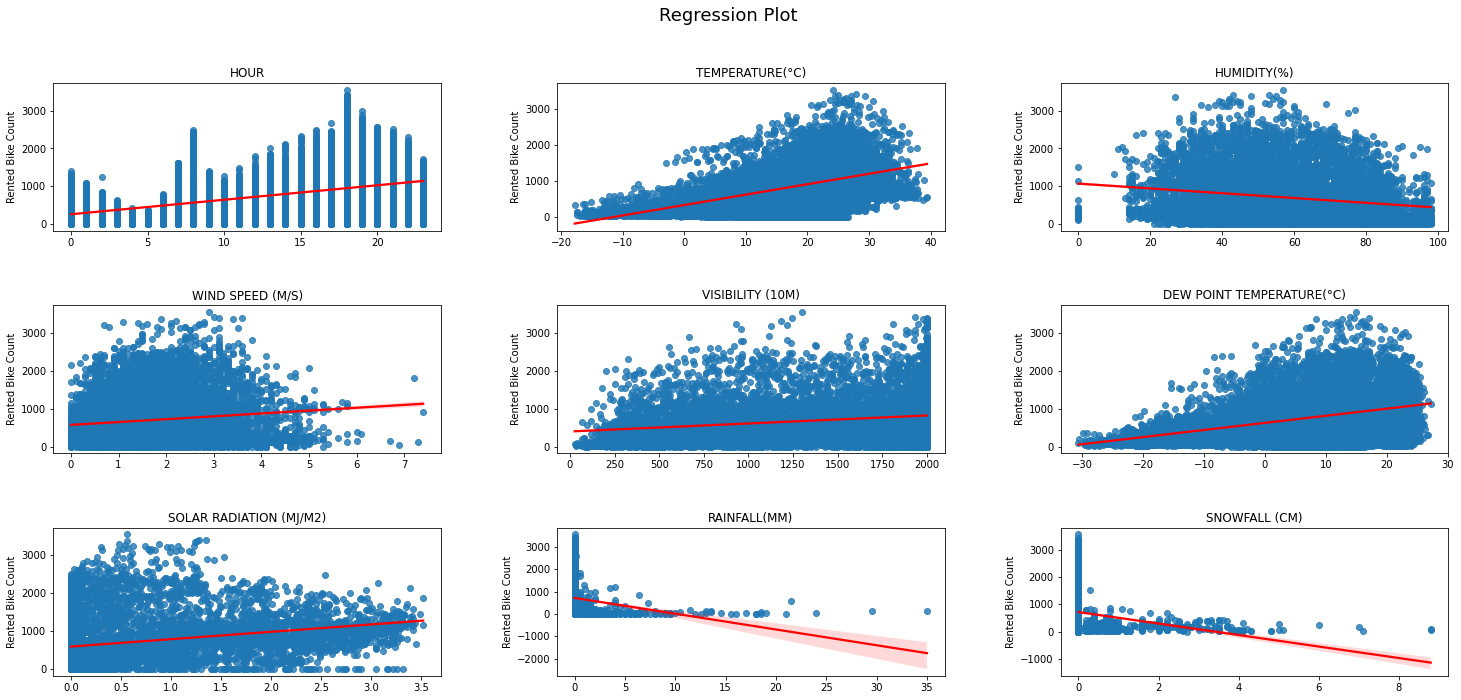

In [40]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25, 15))
plt.suptitle("Regression Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features):
  # add a new subplot iteratively

  # filter df and plot ticker on the new subplot axis
  ax = plt.subplot(4,3, n+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  sns.regplot(x=df[ticker],y=df[target],line_kws={"color": "red"})   
  ax.set_title(ticker.upper())
  ax.set_xlabel("")



###Feature Extraction
---
**In order to get deeper insights, we'll be extracting features from the date column. The relevant features extracted will be:**
1.   Weekend: Boolean variable tells if the day falls on a weekend
2.   day of the week
3.   Month
**Features extracted from hour column will be:**
4. Day Phase: Morning, Afternoon,Evening and Night
---






Extracting features from Date column

In [41]:
import datetime as dt
a = df['Date'].iloc[1]

In [43]:
df['Date']=pd.to_datetime(df['Date'])

a = df['Date'].dt.day_name()
df['Weekend']= a.apply(lambda x : 'Yes' if x=='Saturday' or x=='Sunday' else 'No' )
df['DayName'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].apply(lambda x : x.month)

df=df.drop(columns=['Date'],axis=1)
categorical_features.remove('Date')
categorical_features = categorical_features + ['Weekend','DayName','Month']

In [44]:
def phase_day(row):
  
  if 6 <= int(row['Hour']) <=11:
    return 'Morning'

  if 12 <= int(row['Hour'])< 18:
    return 'AfterNoon'

  if 18 <= int(row['Hour'])<=21:
    return 'Evening'

  if 22 <= int(row['Hour']) or int(row['Hour']) < 6  :
    return 'Night'
  
df['Day Phase'] = df.apply(lambda row: phase_day(row), axis =1)
categorical_features.append('Day Phase')

Since time of the day is cyclic in nature (after 23:59pm it's 00:01am which is 2 minute difference but will be treated as 23 hours and 58 minute difference instead) we are doing sin and cosine transformations

In [79]:
import math
a = 2 * math.pi * df["Hour"] / df["Hour"].max()

df["cos_Hour"] = np.cos(a)
df["sin_Hour"] = np.sin(a)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekend                    8760 non-null   objec

In [47]:
for col in categorical_features:
  print(col, df[col].unique(), '\n')

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 

Weekend ['No' 'Yes'] 

DayName ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday'] 

Month [ 1  2  3  4  5  6  7  8  9 10 11 12] 

Day Phase ['Night' 'Morning' 'AfterNoon' 'Evening'] 



###Count Plot of Categorical Attribbutes

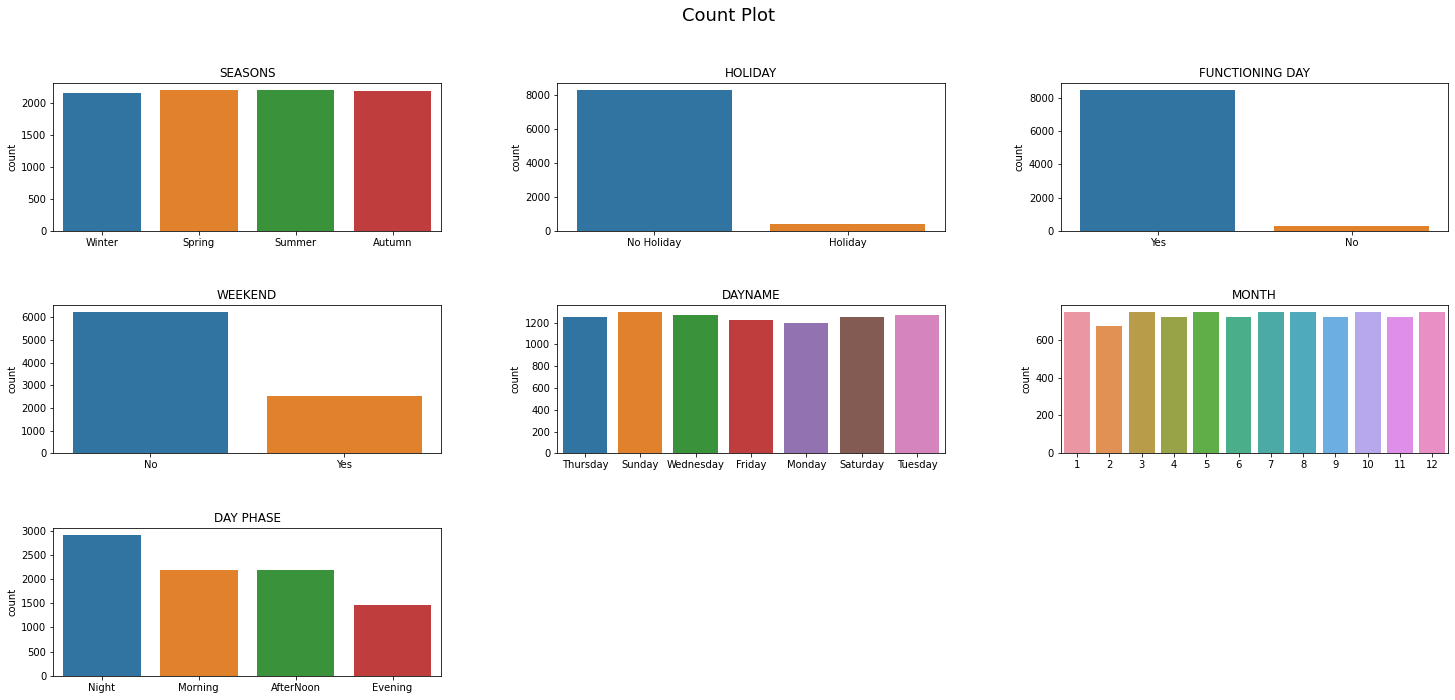

In [48]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25, 15))
plt.suptitle("Count Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(categorical_features):
  # add a new subplot iteratively

  # filter df and plot ticker on the new subplot axis
  ax = plt.subplot(4,3, n+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  sns.countplot(x=df[ticker])   
  ax.set_title(ticker.upper())
  ax.set_xlabel("")



##Questions

---
> * What is the trend of Bike Sharing on an average day?
> * How do Holidays affect Bike Sharing Demand?
> * How do Holidays, Seasons, Weekends and the Month of the year have an effect on this trend?
>* How does the Bike Sharing demand fluctuate in different times of the day?(will be done using boxplot)
---

#### 1. What is the trend of Bike Sharing on an average day?

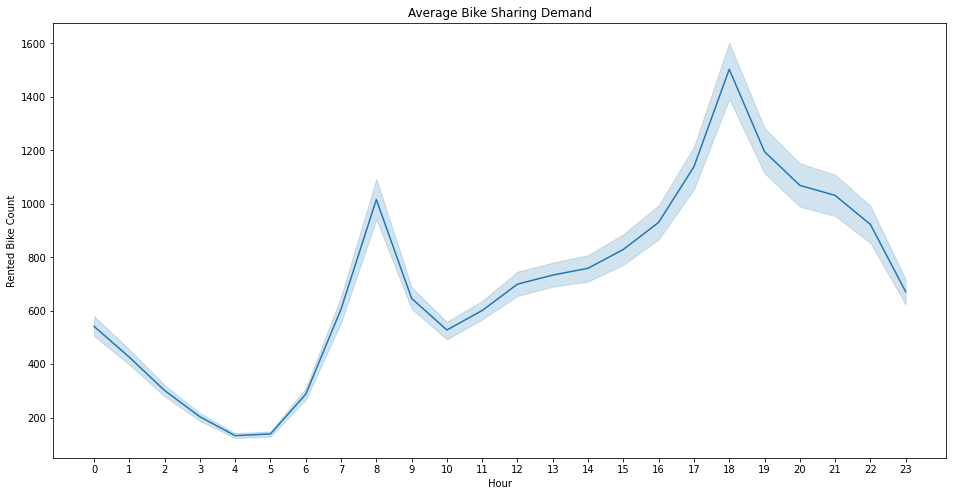

In [49]:
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Hour', y= 'Rented Bike Count', data = df)
plt.title("Average Bike Sharing Demand")
a = plt.xticks(ticks = np.arange(0,24,1))

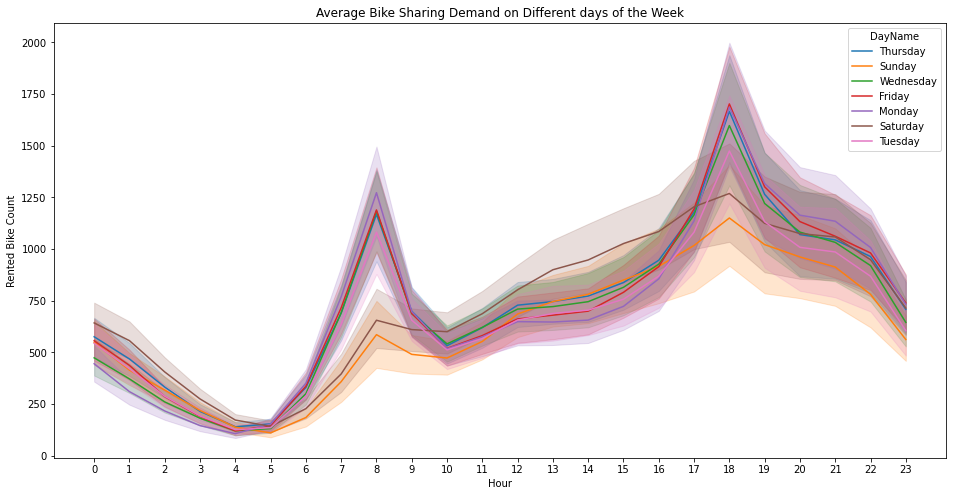

In [56]:
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Hour', y= 'Rented Bike Count',hue ='DayName' , data = df)
plt.title("Average Bike Sharing Demand on Different days of the Week")
a = plt.xticks(ticks = np.arange(0,24,1))

---
>* **Number of Bikes Rented increses from 5 am and reches its first peak at 8am.**
>* **The demand starts raising again at 10 am and reaches the second peak at 6 pm and this is the busiest time of the day.**
>* **The demand keeps decreasing from 6 pm to 4 am next day. 4-5 am is observed to be the quietest hours of the day.**
> * **The mornings are busies on Mondays while evenings are busiest on the last working day, Friday. Bike Sharing is busiest late mornings and afternoons on Saturdays and Sunday**
---

#### 2. How do Holidays affect Bike Sharing Demand?

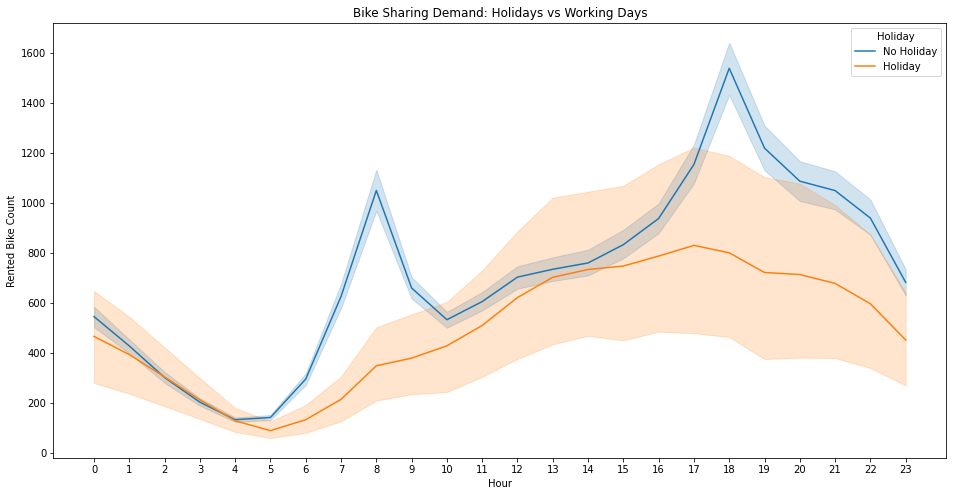

In [50]:
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Hour', y= 'Rented Bike Count',hue ='Holiday' , data = df)
plt.title("Bike Sharing Demand: Holidays vs Working Days")
a = plt.xticks(ticks = np.arange(0,24,1))

---
>* **Bike Sharing Demands are substantially lowered on Holidays in comparison to Working days.**
>* **The peaks aren't identical and the demand is low and increases very gradually. This suggests that the demand is contributed by the Working class people to a notable extent.**
---

#### 3. How do Seasons have an effect on this trend?

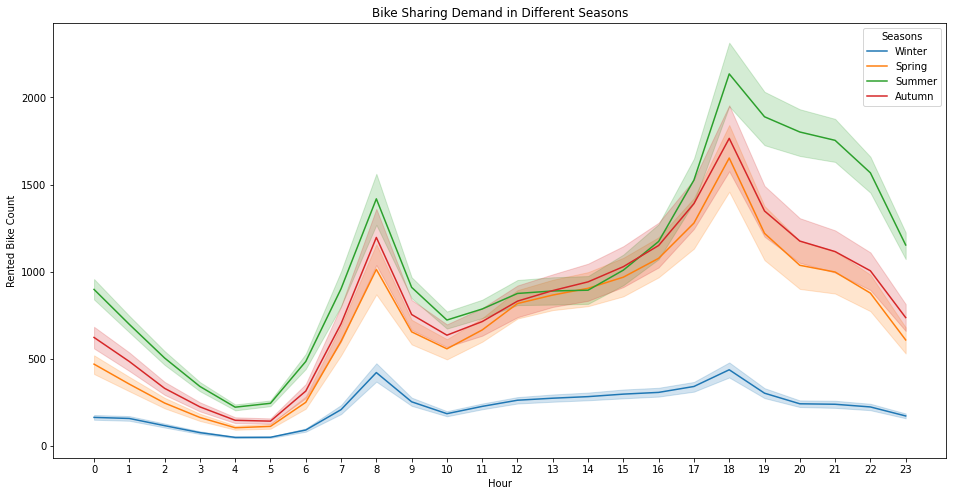

In [53]:
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Hour', y= 'Rented Bike Count',hue ='Seasons' , data = df)
plt.title("Bike Sharing Demand in Different Seasons")
a = plt.xticks(ticks = np.arange(0,24,1))

---
>* ****
>* **The demand starts raising again at 10 am and reaches the second peak at 6 pm and this is the busiest time of the day.**
>* **The demand keeps decreasing from 6 pm to 4 am next day. 4-5 am is observed to be the quietest hours of the day.**
> * **The mornings are busies on Mondays while evenings are busiest on the last working day, Friday. Bike Sharing is busiest late mornings and afternoons on Saturdays and Sunday**
---

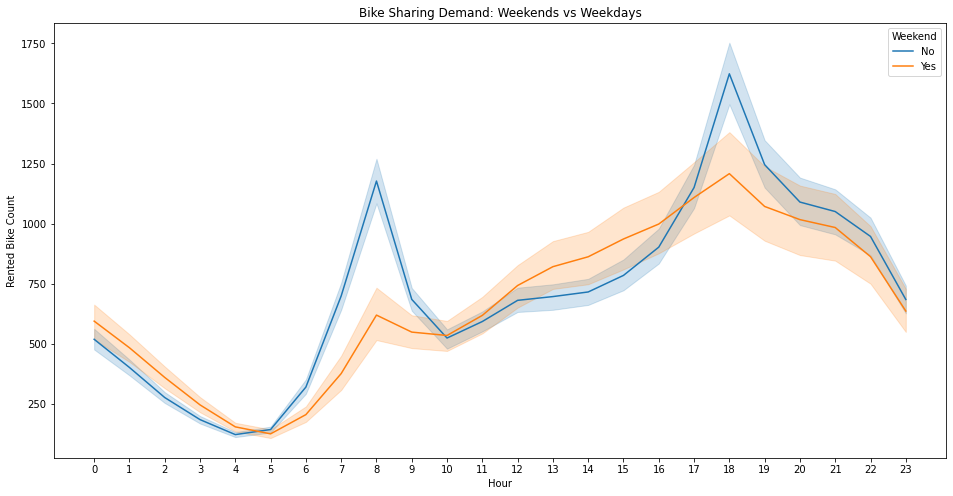

In [54]:
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Hour', y= 'Rented Bike Count',hue ='Weekend' , data = df)
plt.title("Bike Sharing Demand: Weekends vs Weekdays")
a = plt.xticks(ticks = np.arange(0,24,1))



---



>* **The afternoons and late-nights are busier in the weekends as compared to the weekdays while the mornings and late evenings appear quieter**

---



#### 4. How does the Bike Sharing demand fluctuate in different times of the day?

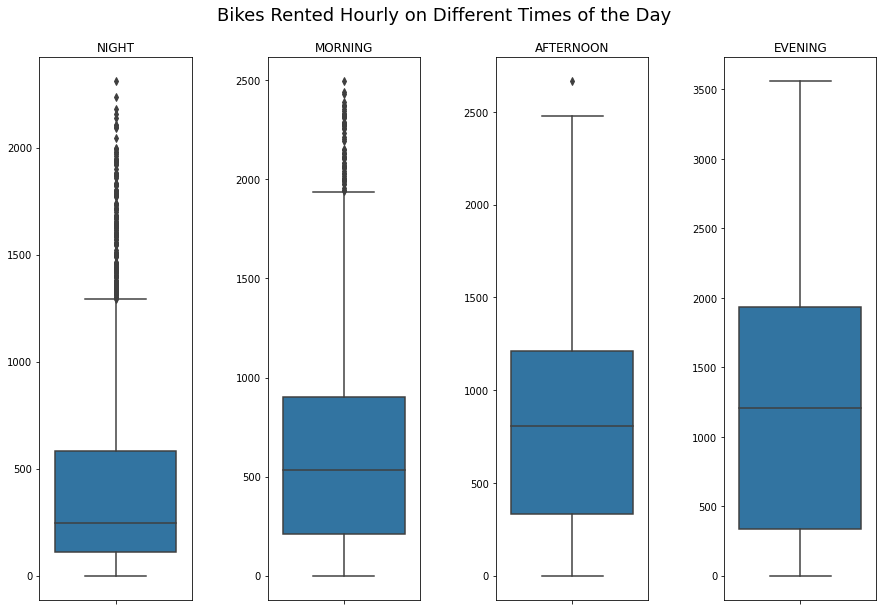

In [75]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10))
plt.suptitle('Bikes Rented Hourly on Different Times of the Day', fontsize=18, y=0.95)

for n,time in enumerate(df['Day Phase'].unique()):
  a = df[df['Day Phase']== time]
  ax = plt.subplot(1,4, n+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.boxplot(y= 'Rented Bike Count', data = a)   
  ax.set_title(time.upper())
  ax.set_ylabel("")


---
>* **Most bike sharing demand is happened in the evening**
---

### Correlation Heatmap

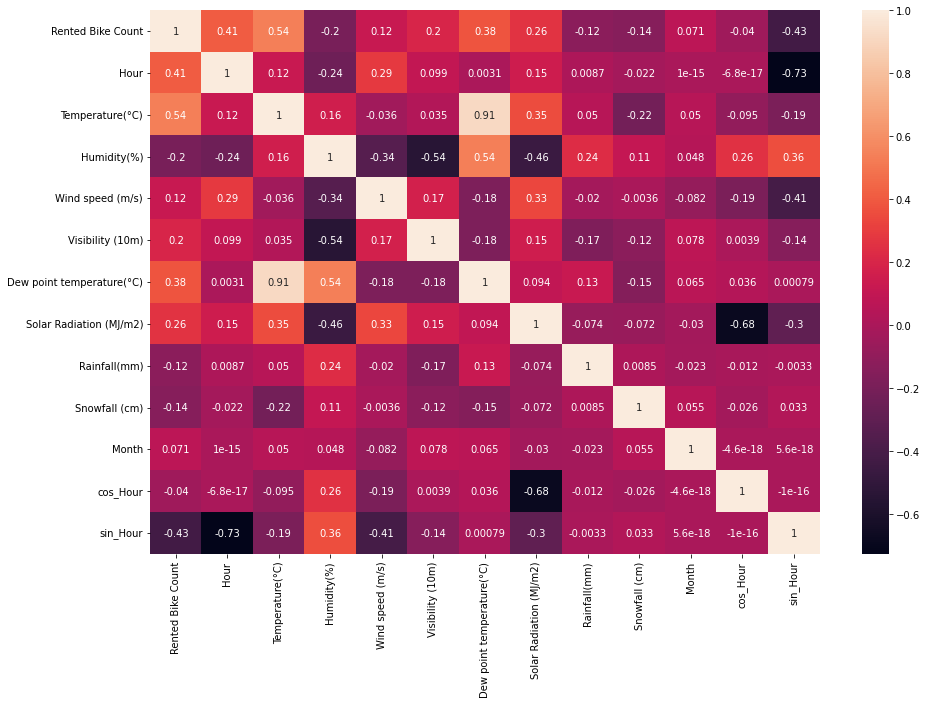

In [82]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

---
>* **Strong correlation of 0.91 observed between Hour and Dew point temperatur**
>* **Rented Bike count has a positive correlation with the Temperature and Hour of the day**
---

#Feature Engineering and Selection

### One Hot Encoding

In [83]:
engineered_df = df.copy()
for ftr in categorical_features:
  engineered_df = pd.concat([pd.get_dummies(engineered_df[ftr],prefix = ftr), engineered_df.drop(ftr, axis = 1)], axis =1)


In [84]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Day Phase_AfterNoon        8760 non-null   uint8  
 1   Day Phase_Evening          8760 non-null   uint8  
 2   Day Phase_Morning          8760 non-null   uint8  
 3   Day Phase_Night            8760 non-null   uint8  
 4   Month_1                    8760 non-null   uint8  
 5   Month_2                    8760 non-null   uint8  
 6   Month_3                    8760 non-null   uint8  
 7   Month_4                    8760 non-null   uint8  
 8   Month_5                    8760 non-null   uint8  
 9   Month_6                    8760 non-null   uint8  
 10  Month_7                    8760 non-null   uint8  
 11  Month_8                    8760 non-null   uint8  
 12  Month_9                    8760 non-null   uint8  
 13  Month_10                   8760 non-null   uint8

###Train Test Split

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [86]:
X,y = engineered_df.drop('Rented Bike Count', axis=1), engineered_df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,  random_state=5)

#Functions

In [87]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor

### Scaling

In [88]:
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


### Feature Importance

In [89]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

### Evaluation

In [90]:
report = {
    'model_type':[],
    'model_name':[],
    'rmse':[],
    'mae':[],
    'R2':[],
    'adjusted R2':[]

}

In [91]:

# function to evaluate and update model and score
def evaluate(modeltype, modelname, Model, X_train, y_train, X_test, y_test):
  from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error

  if modelname in report['model_name']:
    print("Prexisting Model")
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"-------\nTraining {str(Model)} ...")
  Model.fit(X_tr, y_train)

  print(f"\nPredicting{str(Model)} scores ...")

  y_pred = Model.predict(X_te)

  mae = mean_absolute_error(y_test,y_pred)
  report['mae'].append(mae)


  R2 = r2_score(y_test,y_pred)
  report['R2'].append(R2)

  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  report['rmse'].append(rmse)

  adj_r2=1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  report['adjusted R2'].append(adj_r2)


  report['model_name'].append(modelname)
  report['model_type'].append(modeltype)

  plt.figure(figsize=(20,10))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title(modelname)
  plt.show()



  print(f"\nReport Updated\n----------\n")




In [92]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

### Getting Models

In [93]:
#installing catboost
!pip install catboost

     |████████████████████████████████| 76.6 MB 50 kB/s 


In [94]:
from catboost import CatBoostRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

In [95]:
def get_models():
  models, names, model_type = list(), list(), list()

  # LinearReg
  models.append(LinearRegression())
  names.append('Linear Regression')
  model_type.append('Linear')

  #Lasso
  models.append(Lasso(alpha =0.2))
  names.append('Lasso Regression')
  model_type.append('Linear')

  #Ridge
  models.append(Ridge(alpha =0.5))
  names.append('Ridge Regression')
  model_type.append('Linear')


  # DecisionTree
  models.append((DecisionTreeRegressor()))
  names.append('DecisionTree Regressor')
  model_type.append('Tree')

  #RandomForest
  models.append(RandomForestRegressor())
  names.append('RandomForest Regressor')
  model_type.append('Ensemble Method')


  # AdaBoosting
  models.append(AdaBoostRegressor())
  names.append('Adaptive Boosting Regressor')
  model_type.append('Ensemble Method')

  # GradientBoosting
  models.append(GradientBoostingRegressor())
  names.append('GradientBoosting Regressor')
  model_type.append('Ensemble Method')

  # CatBoosting
  models.append(CatBoostRegressor())
  names.append('Cat Boosting Regressor')
  model_type.append('Ensemble Method')

  #Bagging
  models.append(BaggingRegressor())
  names.append('Bagging Regressor')
  model_type.append('Ensemble Method')

  #LightGBM Regressor
  models.append(lgb.LGBMRegressor())
  names.append('LightGBM Regressor')
  model_type.append('Ensemble Method')

  #Extreme Gradient Boosting Regressor
  models.append(XGBRegressor())
  names.append('XGB Regressor')
  model_type.append('Ensemble Method')


  # KNN
  models.append(KNeighborsRegressor())
  names.append('K Neighbors Regressor')
  model_type.append('Neighbours')

  #Linear SVM
  models.append(LinearSVR())
  names.append('Linear SVR')
  model_type.append('SVM')
  
  return models, names, model_type

#Model Deployment

In [96]:
X_train_scaled, X_test_scaled = do_scale(X_train,X_test)

In [97]:
X_train_scaled.shape, X_test_scaled.shape

((7008, 44), (1752, 44))

###Spot Checking ML models

-------
Training LinearRegression() ...

PredictingLinearRegression() scores ...


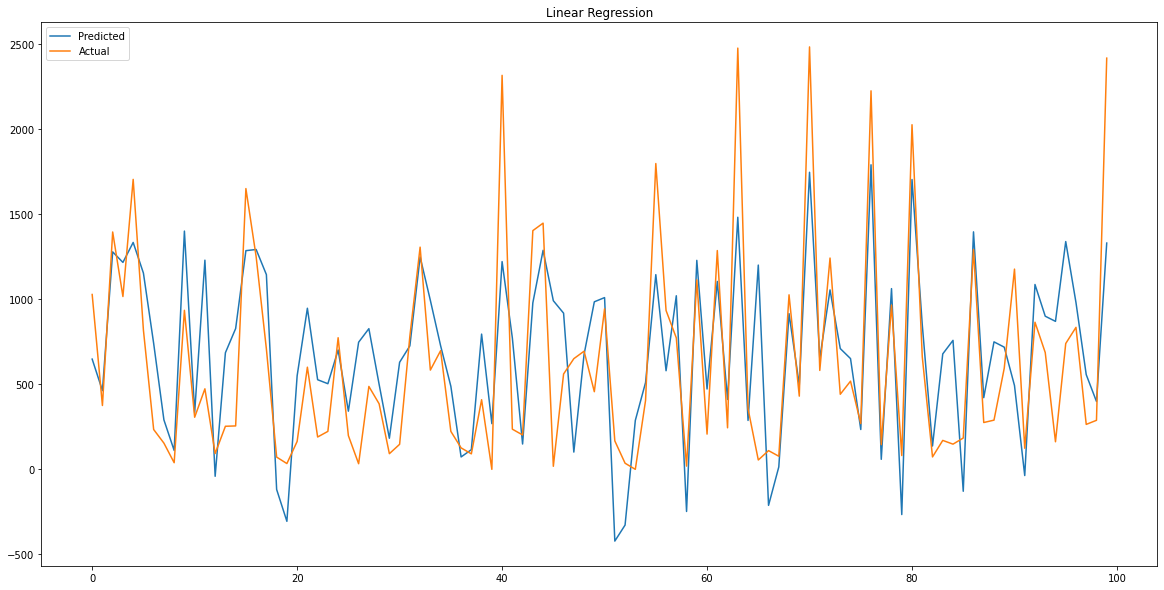


Report Updated
----------

-------
Training Lasso(alpha=0.2) ...

PredictingLasso(alpha=0.2) scores ...


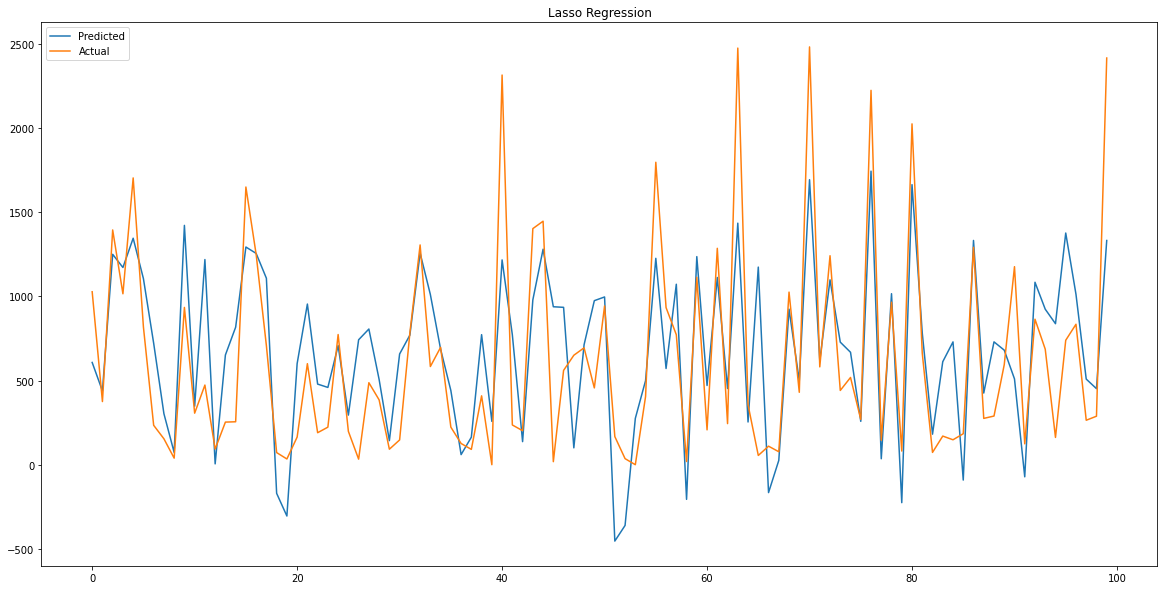


Report Updated
----------

-------
Training Ridge(alpha=0.5) ...

PredictingRidge(alpha=0.5) scores ...


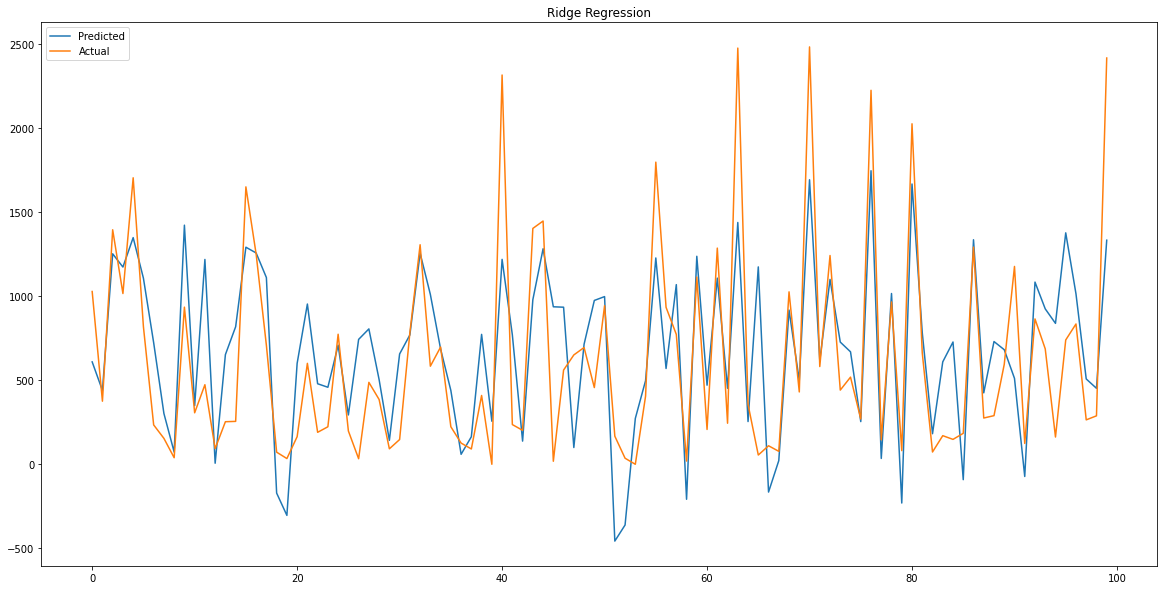


Report Updated
----------

-------
Training DecisionTreeRegressor() ...

PredictingDecisionTreeRegressor() scores ...


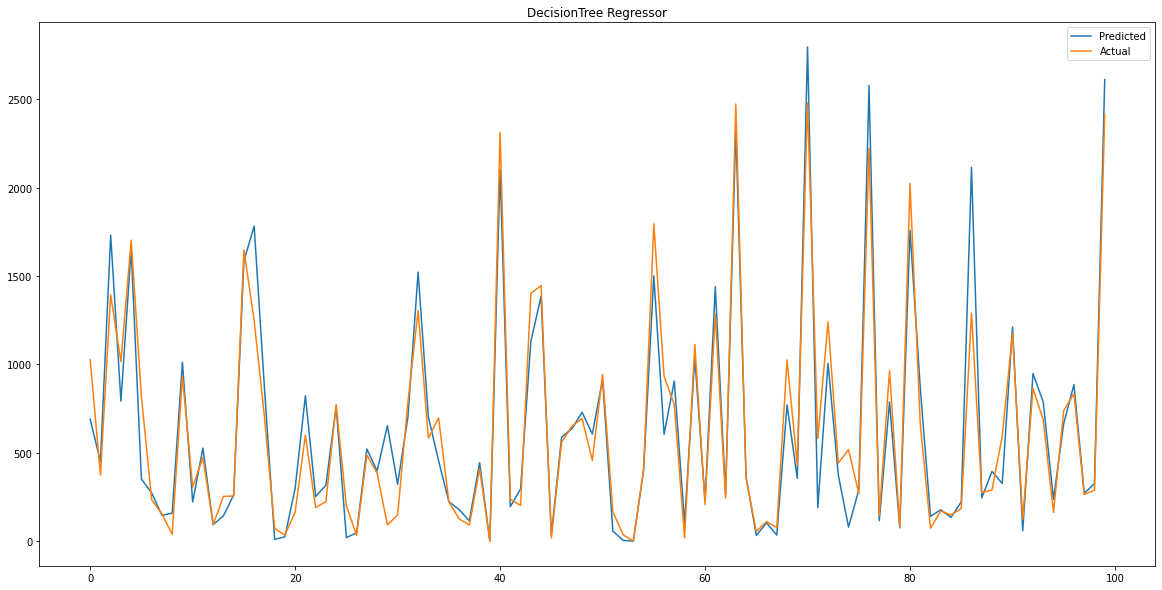


Report Updated
----------

-------
Training RandomForestRegressor() ...

PredictingRandomForestRegressor() scores ...


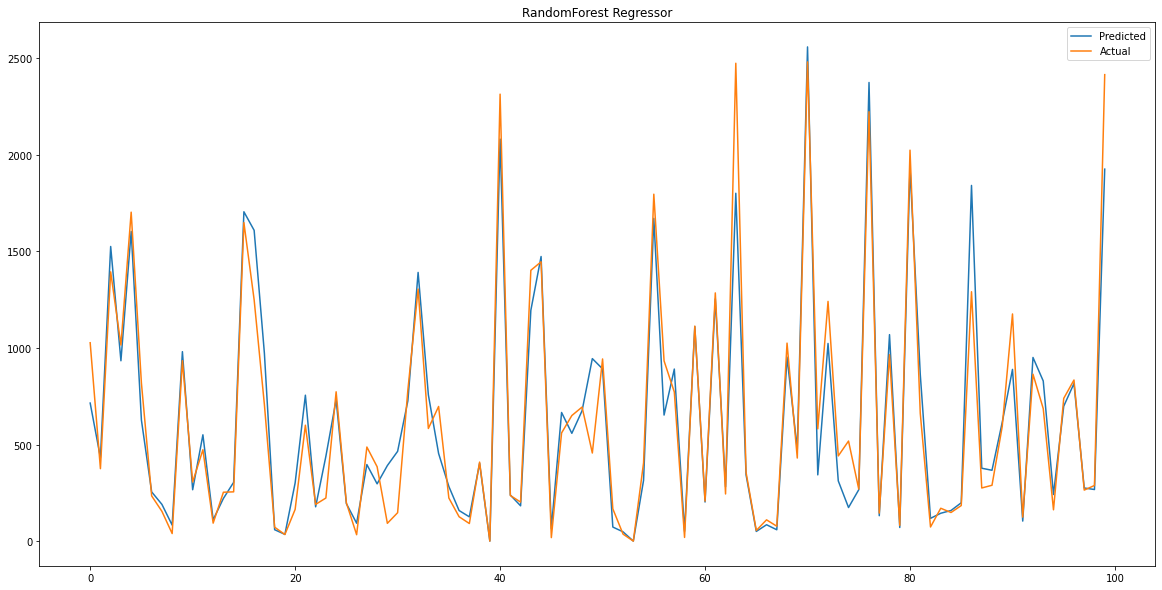


Report Updated
----------

-------
Training AdaBoostRegressor() ...

PredictingAdaBoostRegressor() scores ...


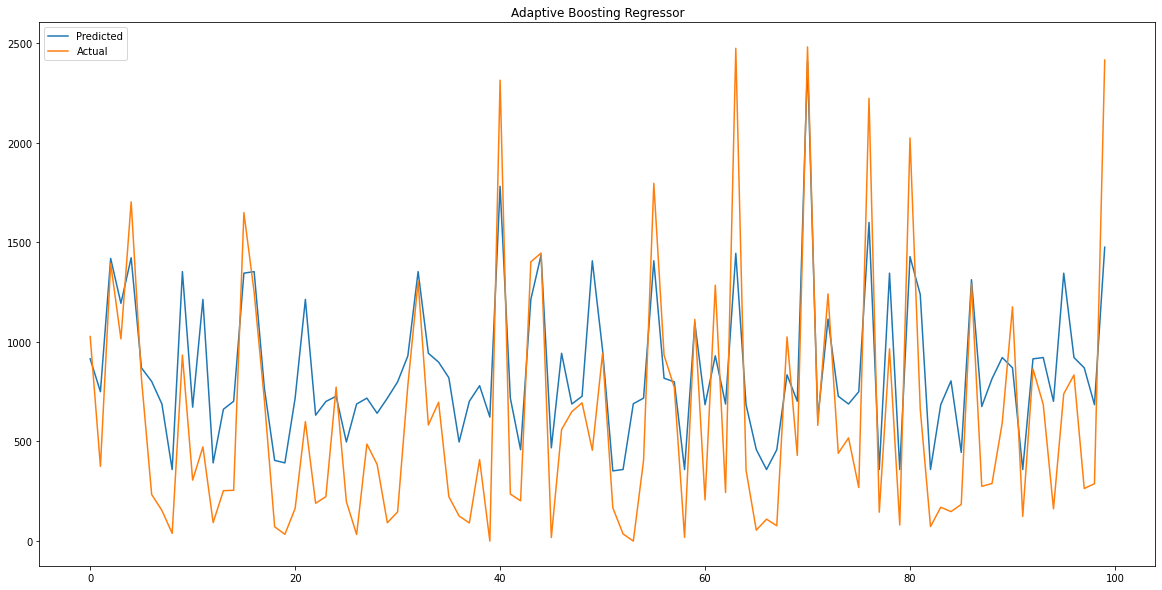


Report Updated
----------

-------
Training GradientBoostingRegressor() ...

PredictingGradientBoostingRegressor() scores ...


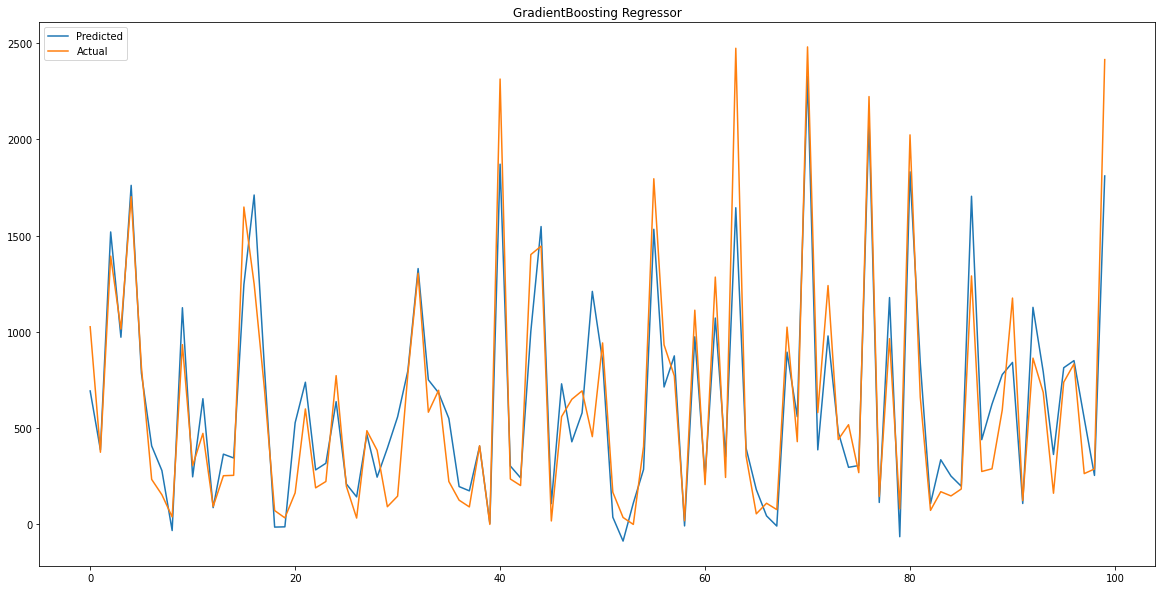


Report Updated
----------

-------
Training <catboost.core.CatBoostRegressor object at 0x7f41e8c9f750> ...
Learning rate set to 0.055691
0:	learn: 621.9951016	total: 60.1ms	remaining: 1m
1:	learn: 599.9185202	total: 72.2ms	remaining: 36s
2:	learn: 579.3474499	total: 82ms	remaining: 27.3s
3:	learn: 559.7815204	total: 112ms	remaining: 27.8s
4:	learn: 541.0280309	total: 117ms	remaining: 23.3s
5:	learn: 524.8036781	total: 120ms	remaining: 20s
6:	learn: 507.9996715	total: 124ms	remaining: 17.6s
7:	learn: 493.4884337	total: 129ms	remaining: 16s
8:	learn: 479.6340416	total: 133ms	remaining: 14.7s
9:	learn: 466.3551925	total: 139ms	remaining: 13.7s
10:	learn: 453.8800435	total: 142ms	remaining: 12.8s
11:	learn: 441.7213432	total: 161ms	remaining: 13.3s
12:	learn: 430.8971974	total: 169ms	remaining: 12.9s
13:	learn: 420.4076974	total: 174ms	remaining: 12.2s
14:	learn: 409.8613074	total: 177ms	remaining: 11.6s
15:	learn: 401.2637189	total: 181ms	remaining: 11.2s
16:	learn: 392.2835909	total: 18

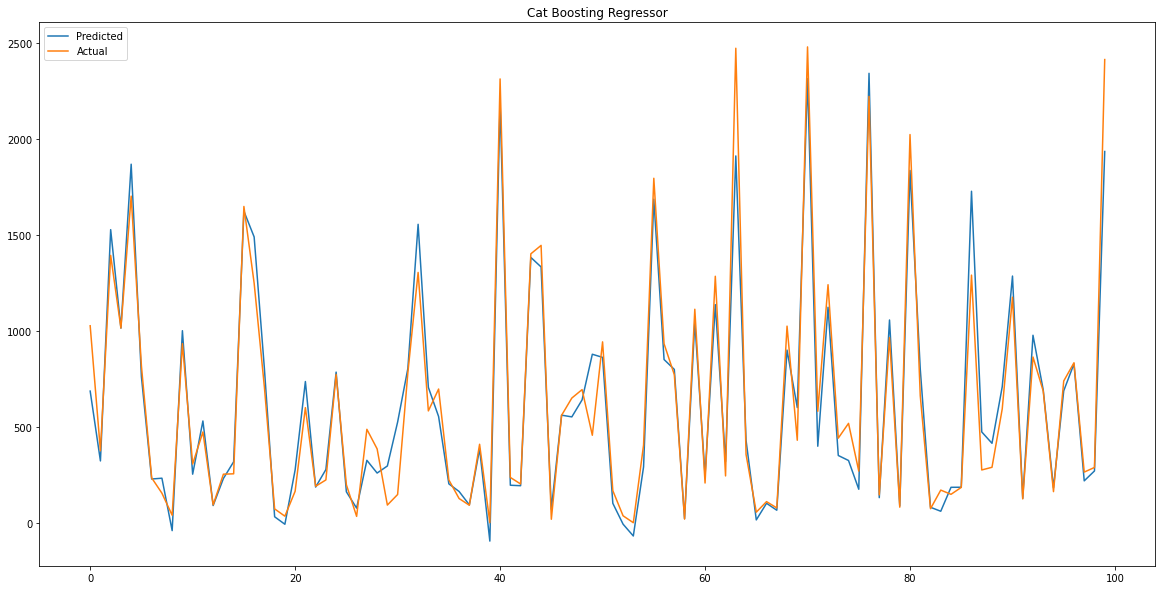


Report Updated
----------

-------
Training BaggingRegressor() ...

PredictingBaggingRegressor() scores ...


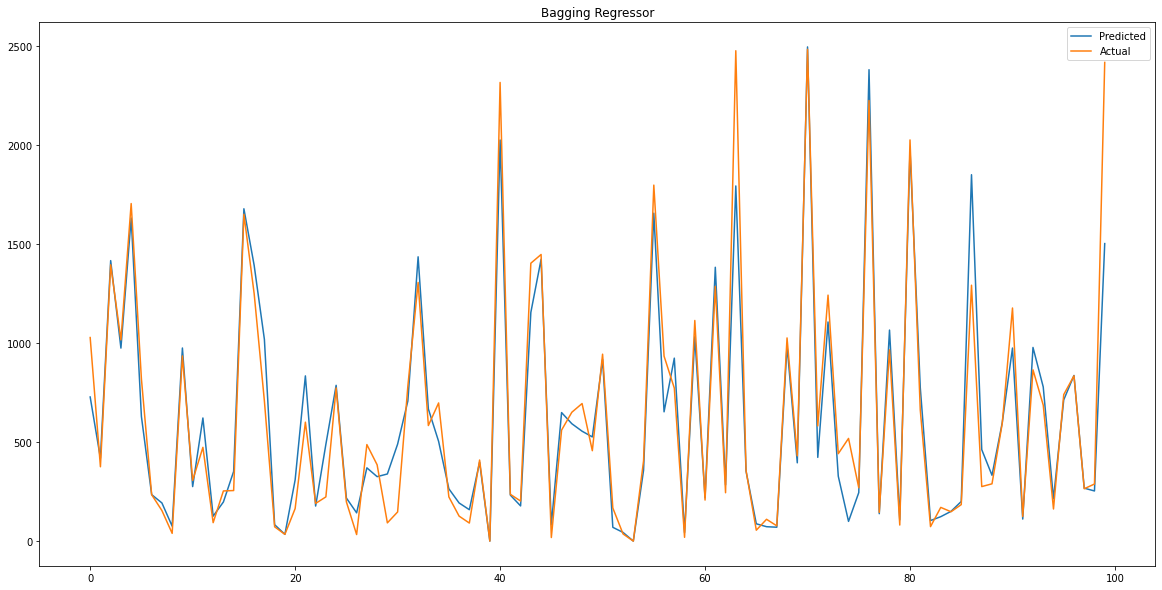


Report Updated
----------

-------
Training LGBMRegressor() ...

PredictingLGBMRegressor() scores ...


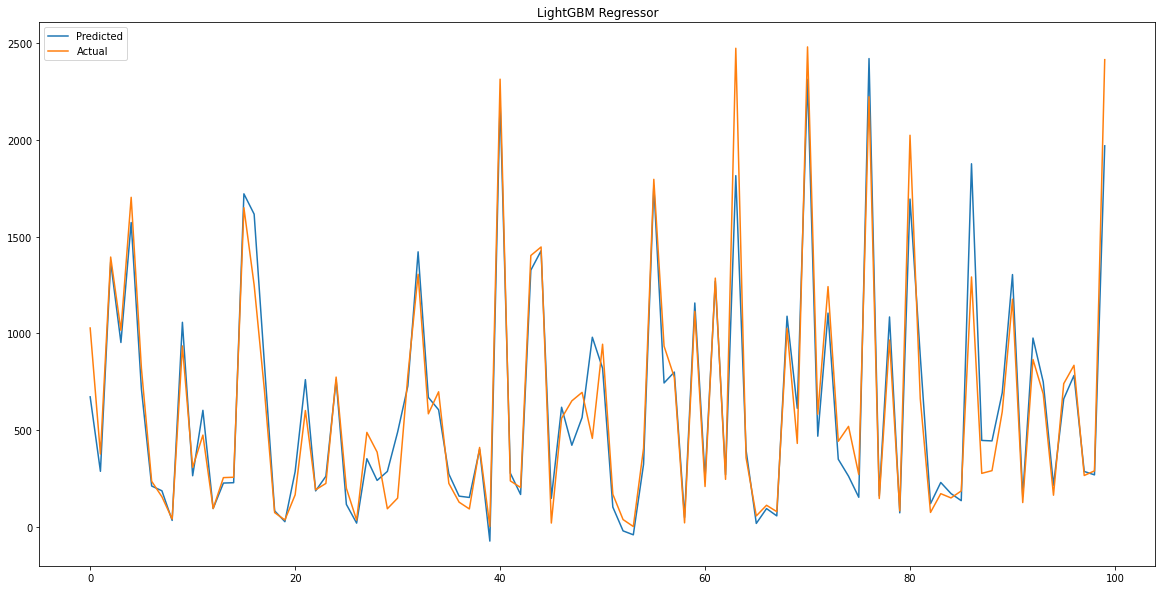


Report Updated
----------

-------
Training XGBRegressor() ...
[17:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

PredictingXGBRegressor() scores ...


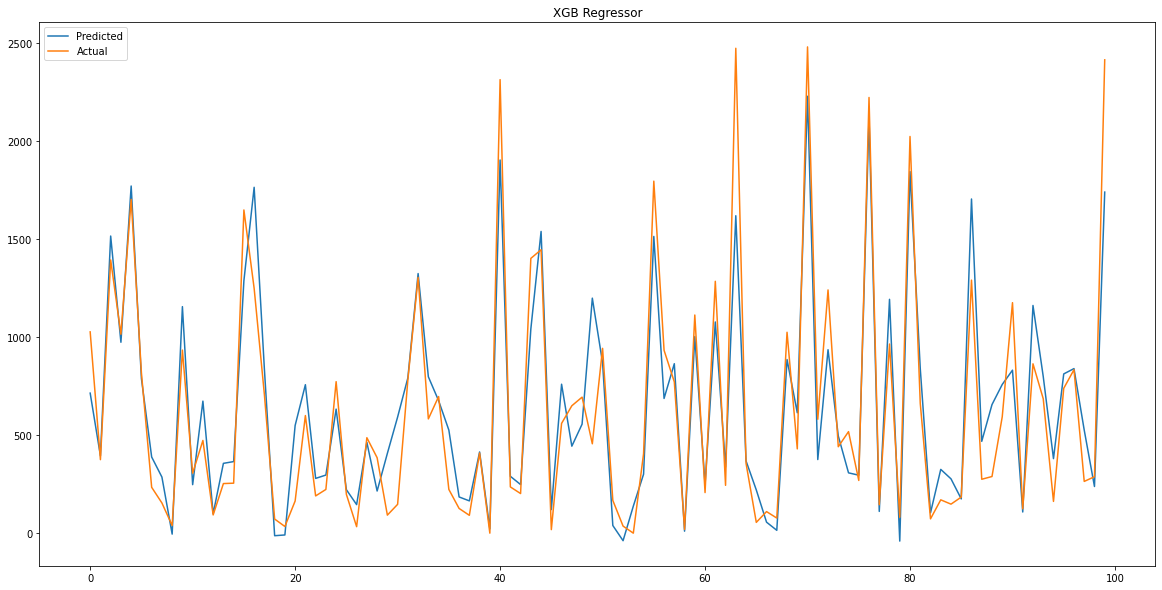


Report Updated
----------

-------
Training KNeighborsRegressor() ...

PredictingKNeighborsRegressor() scores ...


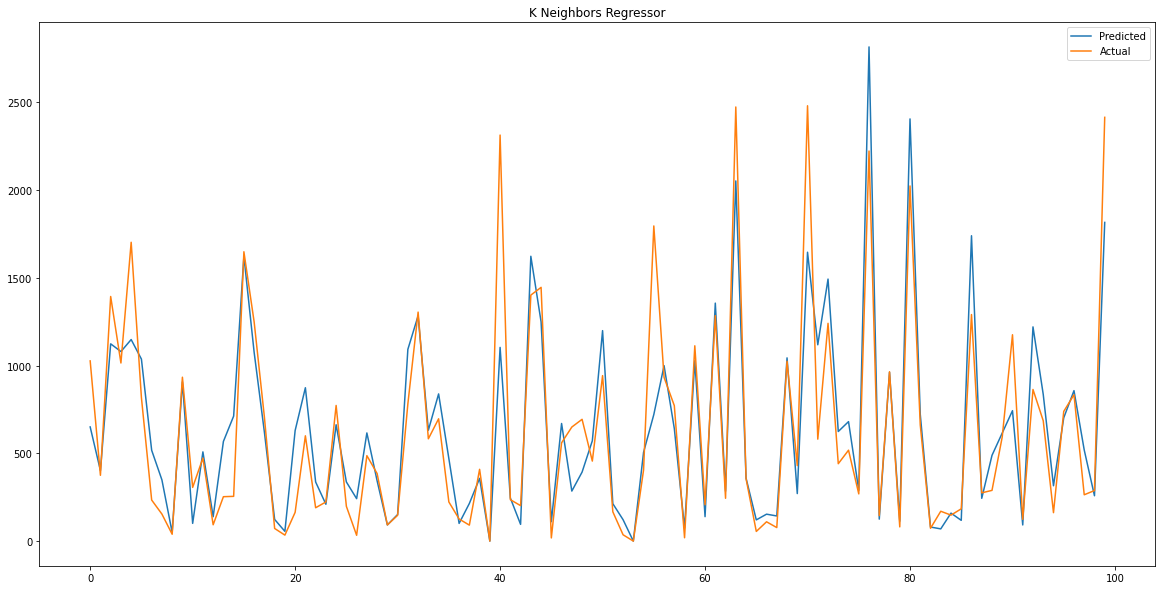


Report Updated
----------

-------
Training LinearSVR() ...

PredictingLinearSVR() scores ...


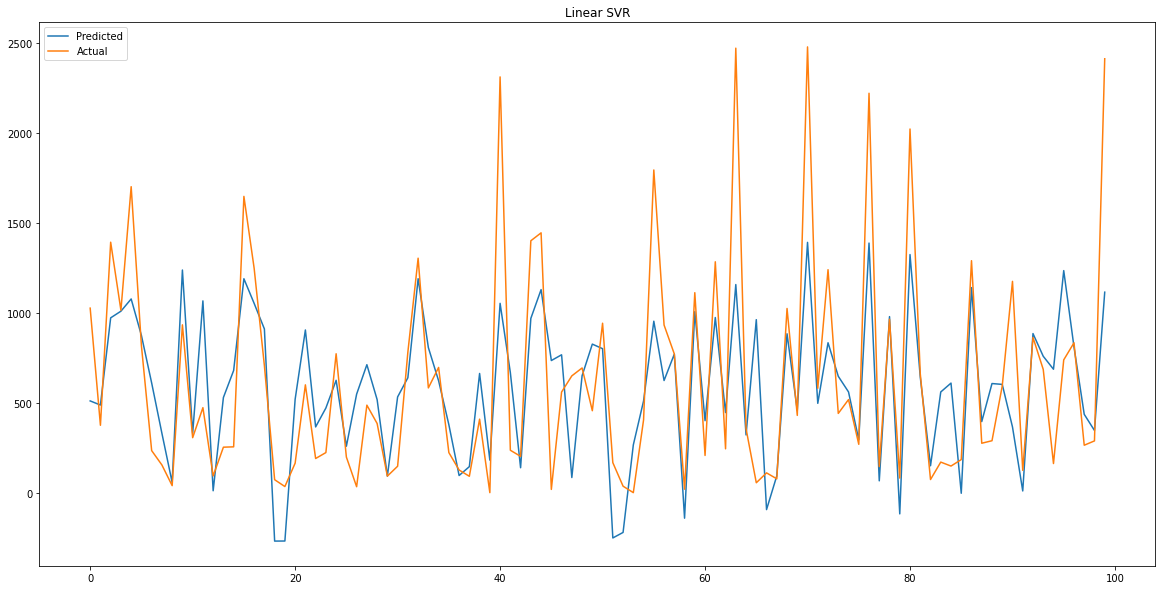


Report Updated
----------



In [98]:
Model, modelname, modeltype = get_models()
for i in range(len(Model)):
  evaluate(modeltype[i], modelname[i], Model[i], X_train_scaled , y_train, X_test_scaled,y_test)

In [99]:
display_report()

,model_type,model_name,rmse,mae,R2,adjusted R2
0,Linear,Linear Regression,401.470176,304.455950,0.612428,0.493462
1,Linear,Lasso Regression,400.637466,303.234757,0.614034,0.481881
2,Linear,Ridge Regression,400.720222,303.359187,0.613874,0.482186
3,Tree,DecisionTree Regressor,277.978066,156.985731,0.814191,0.720523
4,Ensemble Method,RandomForest Regressor,207.619276,120.986587,0.896347,0.836834
5,Ensemble Method,Adaptive Boosting Regressor,418.593174,359.137062,0.578662,0.636400
6,Ensemble Method,GradientBoosting Regressor,244.222137,162.721277,0.856578,0.781711
7,Ensemble Method,Cat Boosting Regressor,179.599333,108.493140,0.922437,0.877099
8,Ensemble Method,Bagging Regressor,210.902007,125.364954,0.893043,0.845641
9,Ensemble Method,LightGBM Regressor,197.249618,120.885121,0.906443,0.858042


Cat Boosting Regressor and LightGBM have emerged to be the best performing models with R2 scores of 0.922 and 0.906

###Hyperparameter Tuning

In [101]:
pip install --upgrade scikit-learn

In [102]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [119]:
cbc = CatBoostRegressor()

#create the grid
grid = {'max_depth': [1,3,5,10,12],
        'n_estimators':[100,200,350,400]
        }

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='r2', cv = 3)

#fit the model
gscv.fit(X_train_scaled,y_train)
print(gscv.best_estimator_)


Streaming output truncated to the last 5000 lines.
342:	learn: 50.3130202	total: 7.37s	remaining: 150ms
343:	learn: 50.1093944	total: 7.39s	remaining: 129ms
344:	learn: 49.9205584	total: 7.42s	remaining: 108ms
345:	learn: 49.7533537	total: 7.44s	remaining: 86ms
346:	learn: 49.5671250	total: 7.46s	remaining: 64.5ms
347:	learn: 49.4416615	total: 7.48s	remaining: 43ms
348:	learn: 49.3211079	total: 7.5s	remaining: 21.5ms
349:	learn: 49.1306995	total: 7.52s	remaining: 0us
Learning rate set to 0.12264
0:	learn: 593.8802319	total: 25.1ms	remaining: 8.74s
1:	learn: 546.1727999	total: 43.8ms	remaining: 7.62s
2:	learn: 505.9130576	total: 64.2ms	remaining: 7.42s
3:	learn: 469.1741738	total: 83.9ms	remaining: 7.25s
4:	learn: 438.6587351	total: 103ms	remaining: 7.08s
5:	learn: 410.7379698	total: 132ms	remaining: 7.57s
6:	learn: 385.0872630	total: 152ms	remaining: 7.45s
7:	learn: 362.3817815	total: 171ms	remaining: 7.32s
8:	learn: 345.2589763	total: 190ms	remaining: 7.2s
9:	learn: 329.0721400	total:

In [122]:

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

0.9247001688414027
{'max_depth': 10, 'n_estimators': 350}


-------
Training <catboost.core.CatBoostRegressor object at 0x7f41e4cae6d0> ...
Learning rate set to 0.130754
0:	learn: 584.8090980	total: 24.1ms	remaining: 8.41s
1:	learn: 533.7859096	total: 46.9ms	remaining: 8.16s
2:	learn: 491.9049826	total: 69.5ms	remaining: 8.04s
3:	learn: 455.2986850	total: 91.1ms	remaining: 7.88s
4:	learn: 420.5521389	total: 113ms	remaining: 7.77s
5:	learn: 391.6878404	total: 135ms	remaining: 7.72s
6:	learn: 365.7641835	total: 157ms	remaining: 7.7s
7:	learn: 342.4907111	total: 184ms	remaining: 7.88s
8:	learn: 324.3574864	total: 207ms	remaining: 7.84s
9:	learn: 307.4795645	total: 228ms	remaining: 7.75s
10:	learn: 292.8486510	total: 250ms	remaining: 7.7s
11:	learn: 280.1126024	total: 271ms	remaining: 7.63s
12:	learn: 269.5050320	total: 293ms	remaining: 7.6s
13:	learn: 261.0159152	total: 317ms	remaining: 7.61s
14:	learn: 253.4909377	total: 338ms	remaining: 7.56s
15:	learn: 247.3300574	total: 360ms	remaining: 7.52s
16:	learn: 239.7690232	total: 388ms	remaining: 7.59

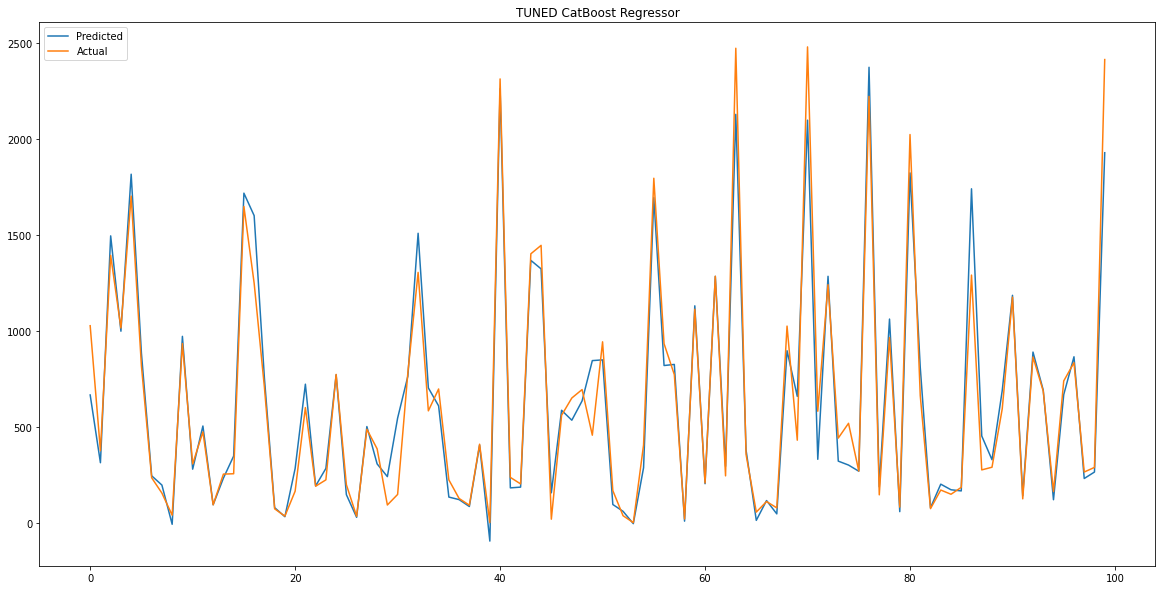


Report Updated
----------



In [123]:
tuned_model = CatBoostRegressor(**gscv.best_params_)
evaluate("Ensemble Method", "TUNED CatBoost Regressor", tuned_model, X_train_scaled , y_train, X_test_scaled,y_test)

In [127]:
display_report().tail(1)

,model_type,model_name,rmse,mae,R2,adjusted R2
13,Ensemble Method,TUNED CatBoost Regressor,167.240882,96.795843,0.932744,0.884052
